## QLIPP CALIBRATION NOTEBOOK

In [6]:
import time
from pycromanager import Bridge
import os, sys
# p = os.path.abspath('../..')
# if p not in sys.path:
#     sys.path.append(p)
import numpy as np
from recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.calib.CoreFunctions import snap_image

ModuleNotFoundError: No module named 'recOrder.calib'

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration(mmc, mm, optimization='min_scalar')

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Will Calibrate Using this ROI:


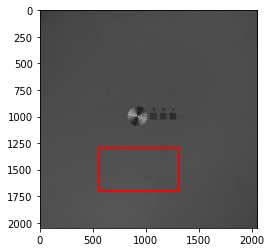

Would You Like to Calibrate Using this ROI? (Yes/No): 	
Calculating Blacklevel ...
Blacklevel: 102.84665361966218

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (36053.057445, 0.010000, 0.250000)
update (28851.079782, 0.010000, 0.350000)
update (22735.679832, 0.010000, 0.450000)
update (19440.034474, 0.010000, 0.550000)
update (14988.262408, 0.110000, 0.550000)
update (12709.716011, 0.210000, 0.450000)
update (5127.726830, 0.210000, 0.550000)
update (2080.143748, 0.310000, 0.550000)
update (1497.114711, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 1497.1147110585384
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 1497.1147110585384

Starting fine search
	Optimize lca ...
	lca = 0.30570
	lcb = 0.65000
	Intensity = 1517.9850007533282
	Intensity Difference = 1375.9693%
	Optimize lcb ...
	lca = 0.30570
	lcb = 0.58967
	Intensity = 510.33658065901795
	In

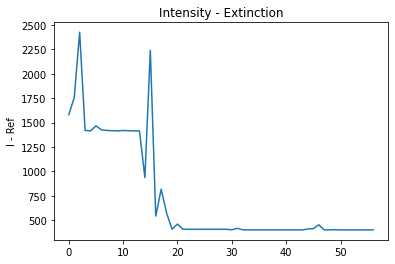

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.20170717986059802
setting LCB = 0.5897


Intensity = 4747.94431461553
--------done--------

Calibrating State2 (I45)...
	Optimize lcb ...
	lca = 0.30170
	lcb = 0.50861
	Intensity = 4748.227024289226
	Intensity Difference = 0.0060%
setting LCA = 0.3017
setting LCB = 0.5086095241979081




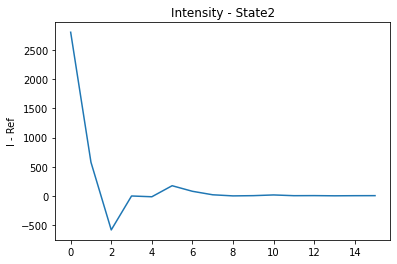

--------done--------

Calibrating State3 (I90)...
	Optimize lca ...
	lca = 0.39730
	lcb = 0.58970
	Intensity = 4755.403947440126
	Intensity Difference = 0.1571%
setting LCA = 0.39729827214501573
setting LCB = 0.5897




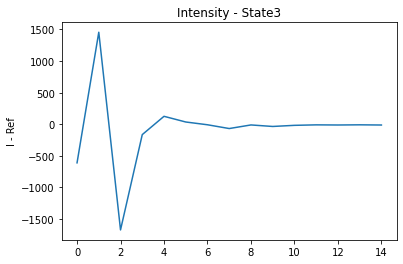

--------done--------

Calibrating State4 (I135)...
	Optimize lcb ...
	lca = 0.30170
	lcb = 0.71273
	Intensity = 4761.092088770921
	Intensity Difference = 0.2769%
setting LCA = 0.3017
setting LCB = 0.7127313384774416




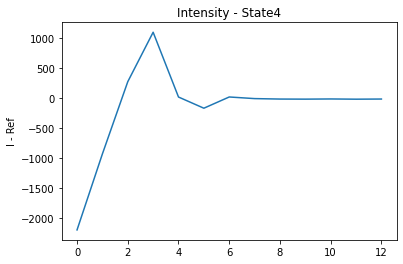

--------done--------

=======Finished Calibration=======

EXTINCTION = 121.18586395811724
Wall time: 30.1 s


In [4]:
%%time

# calibration_scheme = '4-State Extinction'
calibration_scheme = '5-State'
swing = 0.1
wavelength = 546
use_full_FOV = False

meta_file_name = r'Q:\Cameron\Calibration_Testing\metadata_test_5state.txt'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_file_name, use_full_FOV))

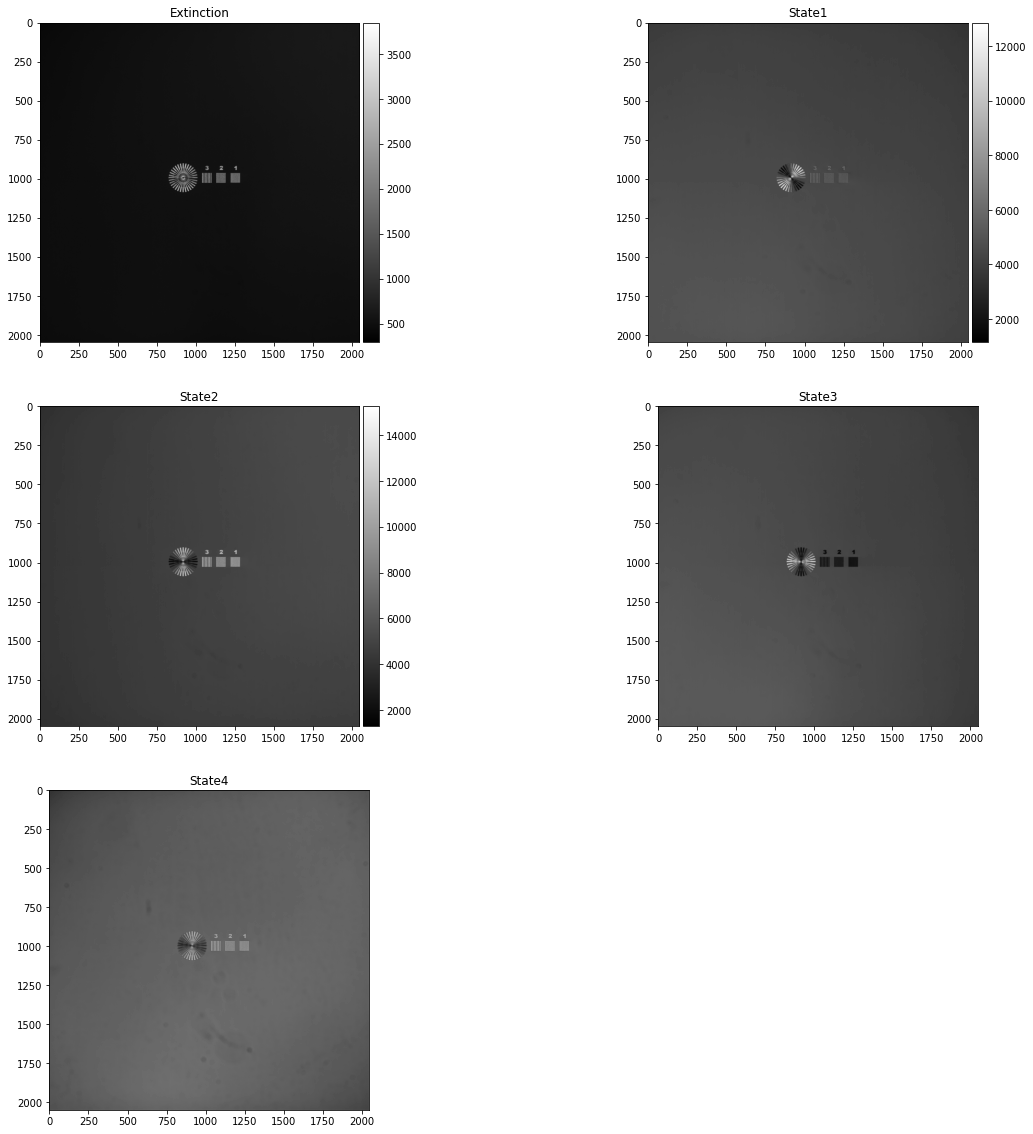

In [5]:
## Take set of BG Images

directory = r'Q:\Cameron\Calibration_Testing\BG_5State'

n_avg = 10

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)